# Time Series Analysis - Part 3

### Goal

- Backward Shift Operator
- Auto Regressive Process
- Partial Autocorrelation Function

## Backward Shift Operator

Is defined as B such that for a random variable X,  
$$BX_t = X_{t-1}$$ or more generally, $$B^kX_t = X_{t-k}$$  

- **Random walk in terms of Backward Shift Operator** 

$$X_t = X_{t-1}+Z_t$$ 

$$X_t - X_{t-1} = Z_t$$

$$X_t - BX_t = Z_t$$

$$(1 - B)X_t = Z_t$$

$$\phi(B) X_t = Z_t$$

> where we define the polynomial operator $\phi(B) = 1-B$

- **MA(q=2) process in terms of Backward Shift Operator**
$$X_t = Z_t + 0.2Z_{t-1} + 0.5Z_{t-2}$$ 

$$X_t = Z_t + 0.2BZ_{t} + 0.5B^2Z_{t}$$ 

$$X_t = (1 + 0.2B + 0.5B^2)Z_t$$

$$X_t = \theta (B)Z_t$$

> where $\theta(B) = 1 + 0.2B + 0.5B^2$.  
We say that MA(q) is **invertible** if the roots of the polynomial $\theta(B)$ all lie outside the unit circle. Note that invertibility is required to guarantee that the MA process has a unique ACF pattern

- **AR(p=2) process in terms of Backward Shift Operator**
$$X_t = Z_t + 0.2X_{t-1} + 0.5X_{t-2}$$ 

$$X_t = Z_t + 0.2BX_{t} + 0.5B^2X_{t}$$ 

$$X_t - 0.2B - 0.5B^2 = Z_t$$

$$\phi (B)X_t = Z_t$$

> where $\phi(B) = 1 - 0.2B - 0.5B^2$
We say that MA(q) is **stationary** if the roots of the polynomial $\phi(B)$ all lie outside the unit circle. Note that we treat the roots here as complex numbers, so we want the magnitude to be less than 1.
>
>For AR(2) : $$X_t = Z_t + \phi_1X_{t-1} + \phi_2X_{t-2}$$ the stationarity condition is also
- $-1 < \phi_2 < 1$
- $\phi_2 < 1 + \phi_1$
- $\phi_2 < 1 - \phi_1$

## Duality Condition

- Under Invertibility conditions, MA(q) process can be written as AR(q)
- Under Stationarity conditions, AR(p) process can be written as MA(p)

## Example Simulation of AR(p=2)

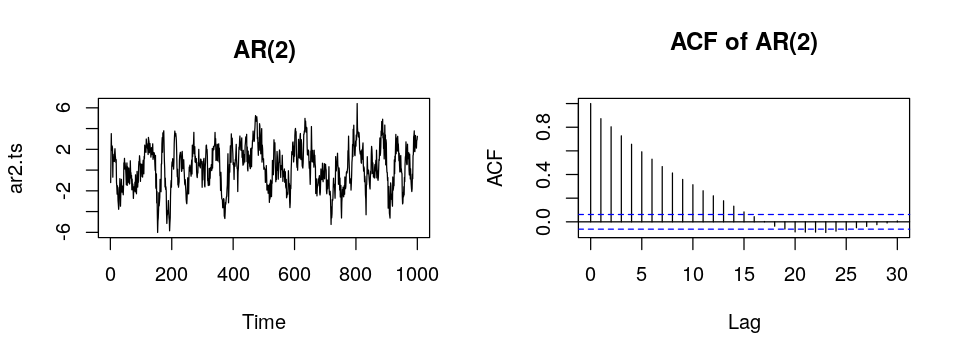

In [1]:
library(repr)
options(repr.plot.width=8, repr.plot.height=3)

phi1 = 0.7
phi2 = 0.2
set.seed(2017)
ar2.ts = arima.sim(list(ar=c(phi1, phi2)), n=1000)


par(mfrow=c(1,2))
plot(ar2.ts, main='AR(2)')
acf(ar2.ts, main='ACF of AR(2)')

- AR process is just a linear combination of past observation + some noise term
- For AR process, the ACF plot does not have a cut-off, but rather an exponential decay. 
- We mostly have positive correlarions in the above ACF because $\phi_1$ and $\phi_2$ are both positive
- See plot below for oppoisite signs between $\phi_1$ and $\phi_2$

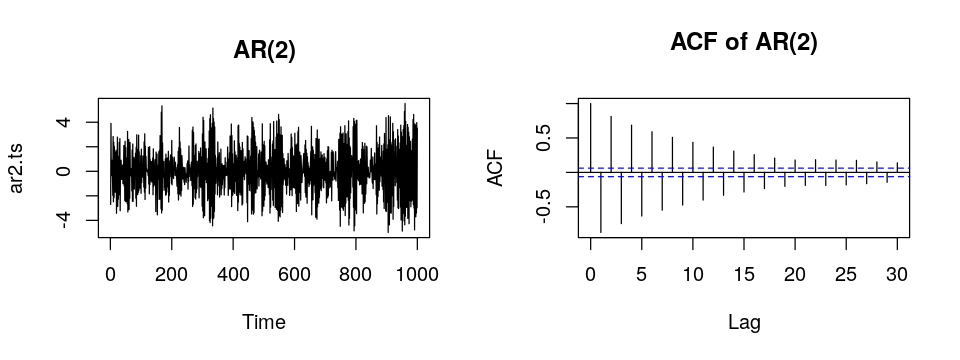

In [2]:
phi1 = -0.7
phi2 = 0.2
set.seed(2017)
ar2.ts = arima.sim(list(ar=c(phi1, phi2)), n=1000)

par(mfrow=c(1,2))
plot(ar2.ts, main='AR(2)')
acf(ar2.ts, main='ACF of AR(2)')

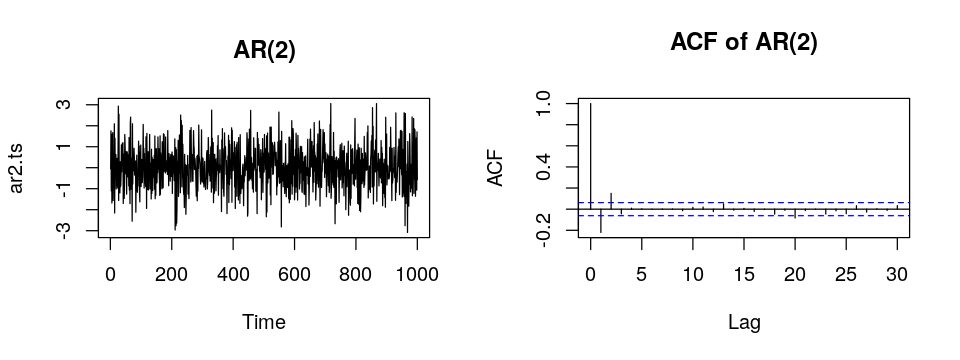

In [3]:
phi1 = -0.2
phi2 = 0.1
set.seed(2017)
ar2.ts = arima.sim(list(ar=c(phi1, phi2)), n=1000)

par(mfrow=c(1,2))
plot(ar2.ts, main='AR(2)')
acf(ar2.ts, main='ACF of AR(2)')

- When the coefficients $\phi_i$ are small, the autocorrelation coefficients decay really fast because history has only small effect on the present. 

## Partial Autocorrelation Function (PACF)

For AR processes, it's difficult to determine the order of the process using the ACF, since there is no cut-off. We can use the **PACF** in this case.   
**For AR process, the PACF will have a cut-off at lag p**   

To understand what the PACF measure, let's consider a motivating example using the bodyfat dataset

In [4]:
#load the isdals package
library(isdals)

#use the bodyfat data, showing the relation between body fat (response) and other variables
data(bodyfat)

#use attach so that we can access the variable names directly
attach(bodyfat)

#preview the data
head(bodyfat)

Fat,Triceps,Thigh,Midarm
11.9,19.5,43.1,29.1
22.8,24.7,49.8,28.2
18.7,30.7,51.9,37.0
20.1,29.8,54.3,31.1
12.9,19.1,42.2,30.9
21.7,25.6,53.9,23.7


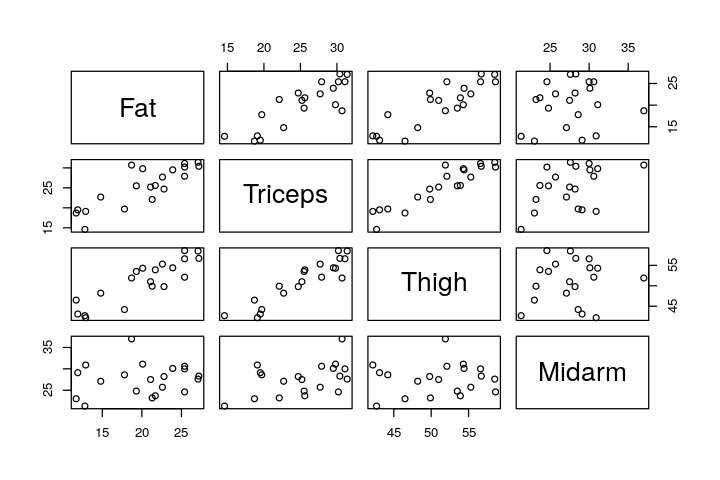

In [5]:
#plot pair autocorrelation
options(repr.plot.width=6, repr.plot.height=4)
pairs(cbind(Fat, Triceps, Thigh, Midarm))

In [6]:
#compute the correlations between variables
cor( cbind(Fat, Triceps,Thigh,Midarm) )

,Fat,Triceps,Thigh,Midarm
Fat,1.0000000,0.8432654,0.8780896,0.1424440
Triceps,0.8432654,1.0000000,0.9238425,0.4577772
Thigh,0.8780896,0.9238425,1.0000000,0.0846675
Midarm,0.1424440,0.4577772,0.0846675,1.0000000


We see that **Triceps** may be a good predictor of **Fat** since the two are highly correlated. However, there are also correlations among the predictors. So what we want is to estimate the correlation between **Fat** and say **Triceps** after factoring out the linear effects of **Thigh** This is what the **partial autocorrelation** measures. The procedure:   
- Regress **Fat** on **Thigh** and get the residuals (remove effect of linear correlation)
- Regress **Triceps** on **Thigh** and get the residuals
- Partial correlation is the correlation between the residuals

**Example**

In [7]:
Fat.hat = predict( lm( Fat ~ Thigh) )
residuals.fat = Fat-Fat.hat

Triceps.hat = predict( lm( Triceps~Thigh) )
residuals.triceps = Triceps-Triceps.hat

#compute partial correlation between Fat and Triceps
cor(residuals.fat, residuals.triceps)

[1] 0.1749822

In [8]:
#use the ppcor library to do thesame thing
library(ppcor)
pcor( cbind(Fat,Triceps,Thigh) )$estimate

Loading required package: MASS


,Fat,Triceps,Thigh
Fat,1.0000000,0.1749822,0.4814109
Triceps,0.1749822,1.0000000,0.7130120
Thigh,0.4814109,0.7130120,1.0000000


**This can be done with multiple variable, e.g. removing the effect of Thigh and Midarm**

In [9]:
Fat.hat = predict( lm( Fat ~ Thigh+Midarm) )
Triceps.hat = predict( lm( Triceps~Thigh+Midarm) )
cor((Fat-Fat.hat), (Triceps-Triceps.hat))

[1] 0.33815

In [10]:
pcor( cbind(Fat,Triceps,Thigh,Midarm) )$estimate

,Fat,Triceps,Thigh,Midarm
Fat,1.0000000,0.3381500,-0.2665991,-0.3240520
Triceps,0.3381500,1.0000000,0.9963725,0.9955918
Thigh,-0.2665991,0.9963725,1.0000000,-0.9926612
Midarm,-0.3240520,0.9955918,-0.9926612,1.0000000


#### Summary  

We define the partial autocorrelation as 

$$corr[(x_{t+h} - \hat{x}_{t+h}), (x_{t} - \hat{x}_{t})]$$ 

i.e. the **PACF** plot is obtained by removing the linear effects of all the term between the two random variables 

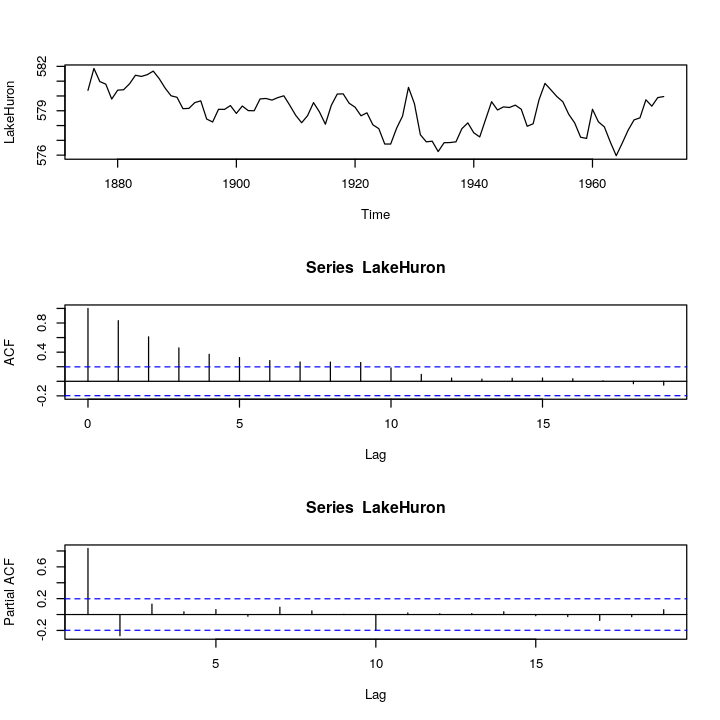

In [11]:
options(repr.plot.width=6, repr.plot.height=6)
par( mfrow=c(3,1) )
plot(LakeHuron)
acf(LakeHuron)
acf(LakeHuron, type="partial")